## Single Perceptron from Scratch in Python

Note: The main of the the project is build a model with linear boundary decesion with the help of single perceptron from scratch

**Problem** : An online rental video company is interested in creating a model to make movie
recommendations to one of its customers, Ms. X. As a consultant to this com-
pany, you are provided with the history of the movies that she accepted or
rejected to watch. She makes her selections solely based on the movie's level of
violence and critic ratings.

**Data** : The data is in movieData.csv

__Solution__ : Train a perceptron that will create a linear boundary decision that will
help the company to make future recommendations to Ms. X.

In [2]:
#libraries requried

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the data

movie =  pd.read_csv("movieData.csv")
movie.head()

,LevelOfViolence,CriticsRating,Watched
0,1,1.2,-1
1,1,3.5,1
2,1,4.2,1
3,2,3.9,1
4,2,2.8,-1


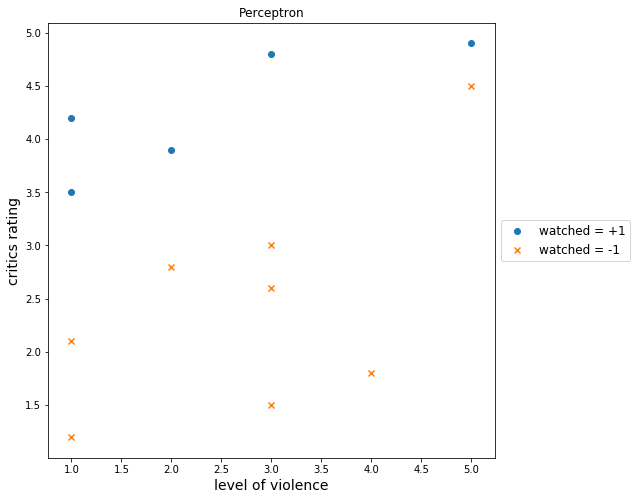

In [5]:
# Data visualization using matplotlib

plt.figure(figsize=(8,8))
plt.scatter(movie[movie.Watched==1].LevelOfViolence,movie[movie.Watched==1].CriticsRating, marker='o', label='watched = +1')
plt.scatter(movie[movie.Watched==-1].LevelOfViolence,movie[movie.Watched==-1].CriticsRating, marker='x', label='watched = -1')
plt.xlabel('level of violence',fontsize=14)
plt.ylabel('critics rating',fontsize=14)   
plt.legend(loc='center left',bbox_to_anchor=(1,0.5), fontsize = 12)
plt.title('Perceptron')
plt.show()

We can observe that we can estimate a linear decision boundary for the above data

In [4]:
# independent variables as level of Violence and Critics Rating
X = movie.iloc[:,0:2].values

# dependent variables as Watched
Y = movie.iloc[:,2].values

In [6]:
# Adding bias '1' to the input features

X = np.column_stack((np.ones(len(X)), X)) 
X

array([[1. , 1. , 1.2],
       [1. , 1. , 3.5],
       [1. , 1. , 4.2],
       [1. , 2. , 3.9],
       [1. , 2. , 2.8],
       [1. , 3. , 3. ],
       [1. , 5. , 4.5],
       [1. , 4. , 1.8],
       [1. , 1. , 2.1],
       [1. , 3. , 4.8],
       [1. , 5. , 4.9],
       [1. , 3. , 1.5],
       [1. , 3. , 2.6]])

In [8]:
Y #output variable

array([-1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1], dtype=int64)

In [9]:
# Initializing parameters for the Perceptron

w = np.zeros(len(X[0]))       # weights
n = 0 
t = 60                        # number of iterations
z = 0                         # treshold
yhat_vec = np.ones(len(Y))
errors = np.ones(len(Y))       # vector for errors (actual - predictions)
 
while errors.any() != 0:
    for i in range(len(X)):
        
        # summation step
        f = np.dot(X[i], w) 
        
        # activation function
        if f > z:                               
            yhat = 1                               
        else:                                   
            yhat = -1
            
        yhat_vec[i] = yhat 

        # Updating the weight
        if Y[i] != yhat:
            w = w + Y[i] * X[i]
        else:
            w = w
    n += 1
    
    # computing the sum-of-squared errors
    for i in range(len(Y)):     
        errors[i] = (Y[i]-yhat_vec[i])**2
    
print(f"The algorithm converge after {n} iterations.")    

The algorithm converge after 39 iterations.


In [10]:
w #weights

array([-28. ,  -9. ,  15.2])

Here line equation **a**x + **b**y + **c** = 0, slope = -a/c and intercept is -b/c, where a = w1, b = w0, c =w2

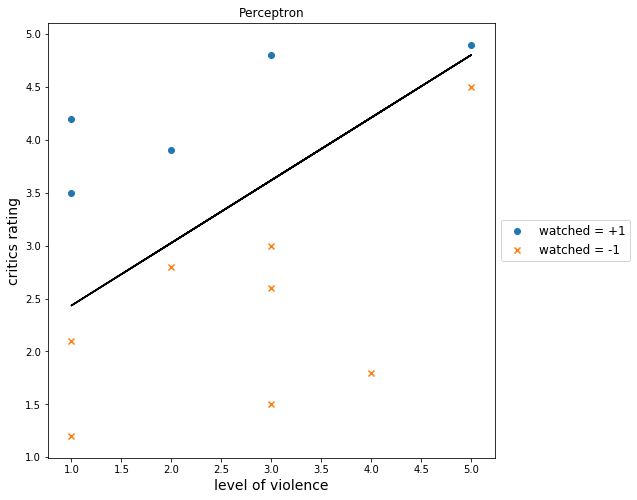

In [11]:
slope = -w[1]/w[2]
intercept = -w[0]/w[2]
y = ( slope * X ) + intercept
plt.figure(figsize=(8,8))
plt.plot(X,y,'k-' )
plt.scatter(movie[movie.Watched==1].LevelOfViolence,movie[movie.Watched==1].CriticsRating, marker='o', label='watched = +1')
plt.scatter(movie[movie.Watched==-1].LevelOfViolence,movie[movie.Watched==-1].CriticsRating, marker='x', label='watched = -1')
plt.xlabel('level of violence',fontsize=14)
plt.ylabel('critics rating',fontsize=14)   
plt.legend(loc='center left',bbox_to_anchor=(1,0.5), fontsize = 12)
plt.title('Perceptron')
plt.show()